# PROJECT OBJECTIVE: 
We will build a recommendation system using popularity based and collaborative filtering methods to recommend 
mobile phones to a user which are most popular and personalised respectively.
Steps and tasks: [ Total Score: 60 points]
## 1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]
### A. Merge all the provided CSVs into one dataFrame. [2 Marks]

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) # adds a nice background to the graphs
import os

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [2]:
## Reading all csv files individually and printing the shape
file1=pd.read_csv('phone_user_review_file_1.csv',encoding='ISO-8859–1')
file2=pd.read_csv('phone_user_review_file_2.csv',encoding='ISO-8859–1')
file3=pd.read_csv('phone_user_review_file_3.csv',encoding='ISO-8859–1')
file4=pd.read_csv('phone_user_review_file_4.csv',encoding='ISO-8859–1')
file5=pd.read_csv('phone_user_review_file_5.csv',encoding='ISO-8859–1')
file6=pd.read_csv('phone_user_review_file_6.csv',encoding='ISO-8859–1')
print("file1 shape:{}\nfile2 shape:{}\nfile3 shape:{}\nfile4 shape:{}\nfile5 shape:{}\nfile6 shape:{}\n".format(file1.shape,file2.shape,file3.shape,file4.shape,file5.shape,file6.shape))

file1 shape:(374910, 11)
file2 shape:(114925, 11)
file3 shape:(312961, 11)
file4 shape:(98284, 11)
file5 shape:(350216, 11)
file6 shape:(163837, 11)



In [3]:
## Now concat all files 
phone_user_df=pd.concat([file1,file2,file3,file4,file5,file6],axis=0)
phone_user_df.shape

(1415133, 11)

In [4]:
## Alternate way - to do in one shot
all_files = ['phone_user_review_file_1.csv','phone_user_review_file_2.csv','phone_user_review_file_3.csv','phone_user_review_file_4.csv','phone_user_review_file_5.csv','phone_user_review_file_6.csv']
phone_user_df = pd.concat((pd.read_csv(f,encoding='ISO-8859–1') for f in all_files), ignore_index=True)
phone_user_df.shape

(1415133, 11)

In [5]:
phone_user_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [6]:
phone_user_df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,score,score_max
count,1351644.00000,1351644.00000
mean,8.00706,10.00000
std,2.61612,0.00000
min,0.20000,10.00000
25%,7.20000,10.00000
50%,9.20000,10.00000
75%,10.00000,10.00000
max,10.00000,10.00000


In [7]:
phone_user_df.shape

(1415133, 11)

In [8]:
phone_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


### B. Explore, understand the Data and share at least 2 observations. [2 Marks]

In [9]:
### Lets see some sample data
phone_user_df.sample(frac =.001)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
1002296,/cellphones/samsung-galaxy-ace-s5830/,4/5/2012,fr,fr,SFR,avis.sfr.fr,NaN,NaN,Rien ne me convient dans ce tÃ©lÃ©phone : aucu...,BGaillard,SAMSUNG Galaxy Ace
1244276,/cellphones/lg-kp235/,5/7/2011,de,de,Ciao,ciao.de,8.0,10.0,LG KP 235 EINLEITUNG Da ich gerade sehnsÃ¼chti...,svenjablume,LG KP 235
425317,/cellphones/lenovo-vibe-k4-note/,4/5/2016,en,in,Amazon,amazon.in,8.0,10.0,Head sets are not available in the box. Please...,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
1227712,/cellphones/samsung-sgh-j700/,1/13/2009,es,es,Ciao,ciao.es,8.0,10.0,Holita ciao compis!! ÃÂ¿QuÃÂ© tal va todo? y...,Ire84,Samsung SGH-J700
1375757,/cellphones/htc-2125-2100-faraday/,2/9/2006,en,us,Phone Scoop,phonescoop.com,7.0,10.0,"Overall, the Cingular/HTC 2125 is an OK almost...",nomoreatt,2125 / 2100 (Faraday)
...,...,...,...,...,...,...,...,...,...,...,...
1123362,/cellphones/samsung-s5230/,1/14/2014,de,de,Amazon,amazon.de,10.0,10.0,super ware .. preis und qualitÃ¤t einfach spit...,hellwig mario ines hellwig,"Samsung Star S5230 Smartphone (Touchscreen, 3M..."
569995,/cellphones/sony-xperia-t2-ultra/,12/29/2014,pt,br,Extra,extra.com.br,8.0,10.0,Entrega muito rapida,EVERTON,Smartphone Sony Xperia T2 Ultra Dual Branco co...
961139,/cellphones/samsung-galaxy-y-duos/,4/10/2013,ru,ru,Yandex,market.yandex.ru,4.0,10.0,Ð Ð¾Ð±ÑÐµÐ¼ ÑÐµÐ»ÐµÑÐ¾Ð½ Ð¿Ð»Ð¾Ñ Ð¾Ð¹. ÐÑ...,tarasov2765613,Samsung Galaxy Y Duos GT-S6102
1374862,/cellphones/samsung-sph-i300ss-xar/,9/20/2005,es,es,Ciao,ciao.es,10.0,10.0,"3 GB de memoria en un mÃÂ³vil, con eso puede ...",maximunae100,Samsung SGH-I300


#### Insight #1:
- From sample data, there are many non alpha-numeric values in extract, author, product. 

In [10]:
phone_user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415133 entries, 0 to 1415132
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1415133 non-null  object 
 1   date       1415133 non-null  object 
 2   lang       1415133 non-null  object 
 3   country    1415133 non-null  object 
 4   source     1415133 non-null  object 
 5   domain     1415133 non-null  object 
 6   score      1351644 non-null  float64
 7   score_max  1351644 non-null  float64
 8   extract    1395772 non-null  object 
 9   author     1351931 non-null  object 
 10  product    1415132 non-null  object 
dtypes: float64(2), object(9)
memory usage: 118.8+ MB


#### Insight #2:
- There are null values in score, score_max, extract & author.Product has 1 value as null value.
- There are no null values in other fields.

In [11]:
phone_user_df.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,score,score_max
count,1351644.00000,1351644.00000
mean,8.00706,10.00000
std,2.61612,0.00000
min,0.20000,10.00000
25%,7.20000,10.00000
50%,9.20000,10.00000
75%,10.00000,10.00000
max,10.00000,10.00000


#### Insight #3:
- 25% of the population has score value under 7.2. Mean and Median are almost close (8.00 Vs 9.2)
- score_max has all values as 10

In [12]:
## Excluding null values in score field and getting the counts
phone_user_df1=phone_user_df.loc[phone_user_df["score"].notnull()]
phone_user_df1["score"].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
6.1          1
1.5          1
8.9          1
4.9          1
Name: score, Length: 86, dtype: int64

<AxesSubplot:xlabel='score', ylabel='Count'>

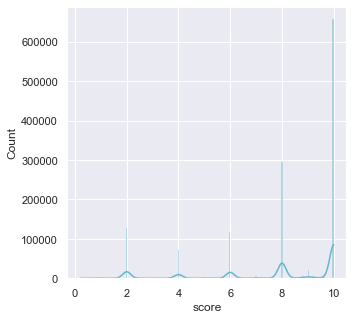

In [13]:
## Univariate analysis on score field to see the distribution
plt.figure(figsize=(5,5))
sns.histplot(data=phone_user_df1,x="score",kde=True,color="c")

<AxesSubplot:title={'center':'Distribution of score'}, ylabel='score'>

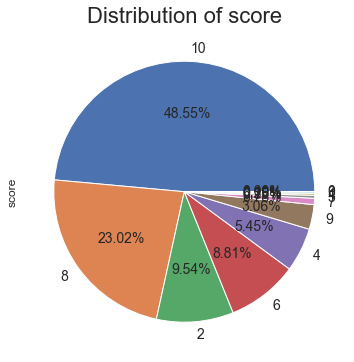

In [14]:
plt.figure(figsize=(6,6))
plt.title("Distribution of score", fontsize=22)
col_value_counts=phone_user_df1["score"].astype("int64").value_counts()
col_value_counts.plot.pie(autopct="%.2f%%",textprops={'fontsize': 14})

#### Insight #4:
- Almost ~50% of population has given score 10. 
- Around 75% of population has given score 8 or above.

### C. Round off scores to the nearest integers. [3 Marks]

In [15]:
## Values before round off
phone_user_df["score"].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
6.1          1
1.5          1
8.9          1
4.9          1
Name: score, Length: 86, dtype: int64

In [16]:
### Let us first try to convert score field to Integer
try:
    phone_user_df["score"]=phone_user_df["score"].astype("int64")
except:
    print("Not all values in score field are numbers, unable to convert to integer")

Not all values in score field are numbers, unable to convert to integer


In [17]:
## Get the null count
phone_user_df["score"].isnull().sum()

63489

In [18]:
phone_user_df["score"].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
6.1          1
1.5          1
8.9          1
4.9          1
Name: score, Length: 86, dtype: int64

In [19]:
phone_user_df_copy=phone_user_df.copy()

##### Let us impute the null values with median score value of the product and then convert to integer

In [20]:
phone_user_df_copy.score = phone_user_df_copy.groupby('product')['score'].apply(lambda x: x.fillna(x.median()))
phone_user_df_copy["score"].isnull().sum()

46904

###### We still see nulls because these products have all scores as nulls. So above code couldnt generate a valid median score value for the products. For these we can impute with overall median score value.

In [21]:
phone_user_df_copy.score = phone_user_df_copy.score.fillna(phone_user_df_copy.score.median())
phone_user_df_copy["score"].isnull().sum()

0

In [22]:
phone_user_df_copy["score"].value_counts()

10.00    663202
8.00     300598
2.00     128533
6.00     117102
4.00      72659
          ...  
7.15          1
9.25          1
8.75          1
6.10          1
4.90          1
Name: score, Length: 102, dtype: int64

In [23]:
### Now converting to integer which will do the round off.
phone_user_df_copy["score"]=phone_user_df_copy["score"].astype("int64")
phone_user_df_copy.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score          int64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [24]:
phone_user_df_copy["score"].value_counts()

10    663202
8     316188
2     129026
6     119678
9      91073
4      73833
7      10995
5       5018
1       3391
3       2683
0         46
Name: score, dtype: int64

###### All the score values have now been rounded off.

### D. Check for missing values. Impute the missing values, if any. [2 Marks]

###### We have already addressed the score field null values and imputation above. Lets focus on other fields. 

In [25]:
### Let us get the null counts in all fields
for x in phone_user_df_copy.columns:
    print("Column name :{}, Number of null values :{}".format(x,phone_user_df_copy[x].isnull().sum()))

Column name :phone_url, Number of null values :0
Column name :date, Number of null values :0
Column name :lang, Number of null values :0
Column name :country, Number of null values :0
Column name :source, Number of null values :0
Column name :domain, Number of null values :0
Column name :score, Number of null values :0
Column name :score_max, Number of null values :63489
Column name :extract, Number of null values :19361
Column name :author, Number of null values :63202
Column name :product, Number of null values :1


In [26]:
## If product is null the rating make no sense. So we can drop the one record with null value in product
print("Shape of phone_user_df_copy before:{}".format(phone_user_df_copy.shape))
phone_user_df_copy.dropna(subset=['product'],inplace=True)
print("Shape of phone_user_df_copy after:{}".format(phone_user_df_copy.shape))

Shape of phone_user_df_copy before:(1415133, 11)
Shape of phone_user_df_copy after:(1415132, 11)


In [27]:
## All null values in Author field can be converted to 'Anonymous'  
phone_user_df_copy.fillna({'author':'Anonymous'},inplace=True)

In [28]:
## Getting null counts
for x in phone_user_df_copy.columns:
    print("Column name :{}, Number of null values :{}".format(x,phone_user_df_copy[x].isnull().sum()))

Column name :phone_url, Number of null values :0
Column name :date, Number of null values :0
Column name :lang, Number of null values :0
Column name :country, Number of null values :0
Column name :source, Number of null values :0
Column name :domain, Number of null values :0
Column name :score, Number of null values :0
Column name :score_max, Number of null values :63489
Column name :extract, Number of null values :19361
Column name :author, Number of null values :0
Column name :product, Number of null values :0


## E. Check for duplicate values and remove them, if any. [2 Marks]

In [29]:
### Current phone_user_df.shape (before dropping duplicates)
phone_user_df_copy.shape

(1415132, 11)

In [30]:
#checking for duplicates 
dup_count=phone_user_df_copy.duplicated().sum()
print("Number of duplicates in the phone_user_df : {}".format(dup_count))

Number of duplicates in the phone_user_df : 6420


In [31]:
phone_user_nodups=phone_user_df_copy.drop_duplicates()

In [32]:
### New phone_user_df.shape (After dropping duplicates)
phone_user_nodups.shape

(1408712, 11)

### F. Keep only 1 Million data samples. Use random state=612. [2 Marks]

In [33]:
phone_user_final=phone_user_nodups.sample(n = 1000000, random_state = 612)

In [34]:
phone_user_final.shape

(1000000, 11)

In [35]:
phone_user_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 164239 to 161619
Data columns (total 11 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   phone_url  1000000 non-null  object 
 1   date       1000000 non-null  object 
 2   lang       1000000 non-null  object 
 3   country    1000000 non-null  object 
 4   source     1000000 non-null  object 
 5   domain     1000000 non-null  object 
 6   score      1000000 non-null  int64  
 7   score_max  955380 non-null   float64
 8   extract    986395 non-null   object 
 9   author     1000000 non-null  object 
 10  product    1000000 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 91.6+ MB


In [36]:
phone_user_final.describe()

,score,score_max
count,1000000.000000,955380.0
mean,8.029166,10.0
std,2.570137,0.0
min,0.000000,10.0
25%,8.000000,10.0
50%,9.000000,10.0
75%,10.000000,10.0
max,10.000000,10.0


### G. Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]

In [37]:
phone_user_final=phone_user_final.drop(columns=['phone_url','date','lang','country','source','domain','score_max','extract'],axis=1)

In [38]:
phone_user_final

,score,author,product
164239,7,Roger,Samsung Galaxy A3 (2016)
932909,10,Eileen P. Mc Kinley,Pantech Breeze III (AT&T)
767421,2,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)"
985427,9,Lorenzo1,BLACKBERRY 9780
366664,10,Ishmeet singh,OnePlus X (Limited Edition Ceramic)
...,...,...,...
1295562,10,George,Nokia 1112 Sim Free Mobile Phone
1099840,6,"Mr. Harvey J. Kay ""H. Kay""",Sony Ericsson W995 Mobile Phone Sim Free Unlocked
1068002,8,Boltun,Nokia C3
956594,10,Jack,"Samsung C3560 Klapphandy (5,5 cm (2,2 Zoll) TF..."


##### Keeping only author, product, score as these are mandatorily needed. Dropped all other features.

## 2. Answer the following questions. [10 Marks]
### A. Identify the most rated products. [3 Marks]

In [39]:
## Getting all products which have high score counts 
phone_user_final.groupby('product')['score'].count().sort_values(ascending=False).head(10)  

product
Lenovo Vibe K4 Note (White,16GB)       3700
Lenovo Vibe K4 Note (Black, 16GB)      3093
OnePlus 3 (Graphite, 64 GB)            2889
OnePlus 3 (Soft Gold, 64 GB)           2522
Huawei P8lite zwart / 16 GB            1895
Samsung Galaxy Express I8730           1892
Lenovo Vibe K5 (Gold, VoLTE update)    1800
Samsung Galaxy S6 zwart / 32 GB        1669
Nokia 5800 XpressMusic                 1538
Lenovo Vibe K5 (Grey, VoLTE update)    1497
Name: score, dtype: int64

In [40]:
## Getting all products which have high total scores 
phone_user_final.groupby('product')['score'].sum().sort_values(ascending=False).head(10) 

product
Lenovo Vibe K4 Note (White,16GB)       26446
OnePlus 3 (Graphite, 64 GB)            25250
Lenovo Vibe K4 Note (Black, 16GB)      22194
OnePlus 3 (Soft Gold, 64 GB)           21446
Samsung Galaxy Express I8730           18492
Huawei P8lite zwart / 16 GB            15348
Samsung Galaxy S6 zwart / 32 GB        14480
Nokia 5800 XpressMusic                 12657
Lenovo Vibe K5 (Gold, VoLTE update)    12238
Nokia N95                              12056
Name: score, dtype: int64

In [41]:
## Getting all products which have high average score  
phone_user_final.groupby('product')['score'].mean().sort_values(ascending=False).head(10) 

product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...                                     10.0
Elephone P9000 - 4G LTE Smartphone (Android 6.0 Octa Core, 5.5" 2.0GHz 4GB RAM 32GB ROM 8MP/13MP CÃ¡mara, Aluminio del Marco Fingerprint NFC Type-C - Negro    10.0
Samsung Galaxy Core Advance I8580 8GB Unlocked GSM Android Phone - White                                                                                       10.0
Samsung Galaxy Core 2 DUOS G355 Unlocked GSM Quad-Core Cell Phone - White                                                                                      10.0
Samsung Galaxy C9 Pro (Gold, 6GB RAM) Imported                                                                                                                 10.0
Elephone P6000 Unlocked 5 Inch HD OGS Touchscreen Android 4.4.4 KitKat MTK6732 4-Core 4G LTE Phone 8MP CAM 2GB RAM 16 GB ROM (Black)                           10.0
Samsung 

In [42]:
## Getting all product average score  
ratings_mean_count = pd.DataFrame(phone_user_final.groupby('product')['score'].mean()) 

In [43]:
## Getting all product score count
ratings_mean_count['rating_counts'] = pd.DataFrame(phone_user_final.groupby('product')['score'].count())  

In [44]:
## Getting df with score counts and average score for all products
ratings_mean_count.sort_values(by=['score','rating_counts',],ascending=False).head(10)

,score,rating_counts
product,,
Motorola Smartphone Motorola Moto X Desbloqueado Preto Android 4.2.2 CÃ¢mera 10MP e Frontal 2MP MemÃ³ria Interna de 16GB GSM,10.0,137
Motorola Smartphone Motorola Moto G Dual Chip Desbloqueado TIM Android 4.3 Tela 4.5 8GB 3G Wi-Fi CÃ¢mera 5MP - Preto,10.0,128
Samsung Galaxy Note5,10.0,127
Samsung Smartphone Galaxy Win Duos Branco Desbloqueado Dual Chip CÃ¢mera 5MP Processador Quad Core 1.2 Ghz Android 4.1 3G Wi- Fi e MemÃ³ria 8GB,10.0,119
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,118
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi C??mera 5MP,10.0,110
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi CÃ¢mera 5MP,10.0,110
Motorola Smartphone Motorola Novo Moto G DTV Colors Dual Chip XT 1069 Desbloqueado Android 4.4 Tela 5 16GB 3G Wi-Fi CÃ¢mera de 8MP - Preto,10.0,104
Apple iPhone 4S Branco 8GB - Apple,10.0,94


#### Above are the top 10 highly rated products which have high score counts as well good average scores.

### B. Identify the users with most number of reviews. [3 Marks]

In [45]:
phone_user_final.shape

(1000000, 3)

In [46]:
## Getting authors with high score count  
phone_user_final.groupby('author')['score'].count().sort_values(ascending=False).head(10) 

author
Amazon Customer    54612
Anonymous          45880
Cliente Amazon     13620
e-bit               5952
Client d'Amazon     5520
Amazon Kunde        3294
einer Kundin        1894
einem Kunden        1370
unknown             1204
Anonymous           1022
Name: score, dtype: int64

##### Above are list of users with most number of reviews.

### C. Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]

In [47]:
## Getting all products having more than 50 ratings  
product_score_count =phone_user_final.groupby('product')['score'].count() > 50
product_score_count_list=product_score_count[product_score_count].index.tolist()
print(len(product_score_count_list))

4274


In [48]:
## Getting all users having more than 50 ratings
author_score_count =phone_user_final.groupby('author')['score'].count() > 50
author_score_count_list=author_score_count[author_score_count].index.tolist()
print(len(author_score_count_list))

642


In [49]:
## Getting data with all products having more than 50 ratings and all users having more than 50 ratings
phone_user_filtered = phone_user_final[(phone_user_final['product'].isin(product_score_count_list)) & 
                                       (phone_user_final['author'].isin(author_score_count_list))]
phone_user_filtered

,score,author,product
164239,7,Roger,Samsung Galaxy A3 (2016)
767421,2,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)"
9725,9,Anonymous,Samsung Galaxy S7 edge 32GB (Sprint)
821435,2,Anonymous,Samsung I8160 Galaxy Ace 2 Onyx Black [Android...
1278641,10,Anna,Sony Ericsson V630i
...,...,...,...
338246,6,Amazon Customer,Vodafone Smart First 6 Pay As You Go Handset S...
1076129,6,e-bit,Celular Motorola EX115
509492,8,Amazon Customer,"Lenovo Vibe K5 (Silver, 16GB)"
1068002,8,Boltun,Nokia C3


In [50]:
# Number of unique user id and product id in the data
print('Number of unique users in filtered data = ', phone_user_filtered['author'].nunique())
print('Number of unique products in filtered data = ', phone_user_filtered['product'].nunique())

Number of unique users in filtered data =  640
Number of unique products in filtered data =  4063


## 3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]

In [51]:
phone_user_filtered['product'].value_counts().head(10)

Lenovo Vibe K4 Note (White,16GB)                                           2191
Lenovo Vibe K4 Note (Black, 16GB)                                          1832
OnePlus 3 (Graphite, 64 GB)                                                1305
OnePlus 3 (Soft Gold, 64 GB)                                               1236
Lenovo Vibe K5 (Gold, VoLTE update)                                        1120
Lenovo Vibe K5 (Grey, VoLTE update)                                         988
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)                                814
Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)     681
Lenovo Vibe K5 (Silver, 16GB)                                               659
YU Yuphoria YU5010A (Black+Silver)                                          652
Name: product, dtype: int64

In [52]:
phone_user_filtered['author'].value_counts().head(10)

Amazon Customer       40477
Anonymous             28661
Cliente Amazon         6911
e-bit                  4774
Client d'Amazon        2536
Amazon Kunde           2085
einer Kundin           1865
einem Kunden           1329
Anonymous               976
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ      518
Name: author, dtype: int64

##### There are 2 'Anonymous' users. One may be having extra spaces. We can convert all to have 'Anonymous' (without spaces). Also there are few records which has '?' as values for 'author'. We can convert those as well to 'Anonymous'.

In [53]:
phone_user_filtered[phone_user_filtered['author'].str.contains('\?')]

,score,author,product
823849,10,????????????????,Nokia Lumia 820
835685,10,?????????????,Nokia 112
898436,8,???????????,Samsung C3322 (???????????)
866110,8,???????????? ??????????????,Nokia 603
872465,8,???????????????? ??????????????,Nokia X Dual sim
...,...,...,...
822357,10,??????????,Samsung Galaxy Ace 2
870996,9,????????,Sony Xperia E (??????????)
855420,4,??????????????,Apple iPhone 5 (16Gb)
899570,10,???????????? ????????,Nokia Asha 311


In [55]:
phone_user_filtered.loc[phone_user_filtered["author"].str.contains('\?'),"author"]='Anonymous'

In [56]:
phone_user_filtered.loc[phone_user_filtered['author'].str.contains('Anonymous'),"author"] = 'Anonymous'

In [57]:
phone_user_filtered.head()

,score,author,product
164239,7,Roger,Samsung Galaxy A3 (2016)
767421,2,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)"
9725,9,Anonymous,Samsung Galaxy S7 edge 32GB (Sprint)
821435,2,Anonymous,Samsung I8160 Galaxy Ace 2 Onyx Black [Android...
1278641,10,Anna,Sony Ericsson V630i


In [58]:
phone_user_filtered['author'].value_counts().head(10)

Amazon Customer       40477
Anonymous             30749
Cliente Amazon         6911
e-bit                  4774
Client d'Amazon        2536
Amazon Kunde           2085
einer Kundin           1865
einem Kunden           1329
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ      518
Ð¡ÐµÑÐ³ÐµÐ¹            431
Name: author, dtype: int64

In [59]:
## Shape of the final filtered dataframe
phone_user_filtered.shape

(129697, 3)

In [60]:
#Split dataframe phone_user_filtered into train and test datasets on 70:30 ratio
phone_train, phone_test = train_test_split(phone_user_filtered, test_size = 0.3, random_state=1)


In [61]:
print("phone train df shape :{}".format(phone_train.shape))
print("phone test df shape :{}".format(phone_test.shape))

phone train df shape :(90787, 3)
phone test df shape :(38910, 3)


In [62]:
phone_train_grouped = phone_train.groupby('product').agg(score_mean=('score','mean'),score_count=('score','count')).reset_index()
phone_train_grouped.head()

,product,score_mean,score_count
0,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(9...,6.400000,5
1,6682 / 6681,9.000000,1
2,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK ...",9.454545,11
3,"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui...",8.250000,16
4,"AICEK Coque Samsung Galaxy A3 2016, AICEK Etui...",8.857143,42


In [63]:
#Sort the products on recommendation score 
phone_train_sort = phone_train_grouped.sort_values(by=['score_mean','score_count'],ascending=False).reset_index()
      
#Generate a recommendation rank based upon score 
phone_train_sort['rank'] = phone_train_sort.index + 1
          
#Get the top 5 recommendations 
popularity_recommendations = phone_train_sort.head(5) 
popularity_recommendations 

,index,product,score_mean,score_count,rank
0,20,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÐµÐ±ÑÐ...,10.0,36,1
1,21,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹),10.0,32,2
2,2806,Samsung Galaxy Note5,10.0,32,3
3,2008,Nokia 5300 XpressMusic Cep Telefonu,10.0,31,4
4,19,ASUS ZenFone 3 Max ZC520TL 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...,10.0,24,5


In [64]:
# Use popularity based recommender model to make predictions
pd.set_option('mode.chained_assignment', None)
def popular_recommend(author_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['author_id'] = author_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [65]:
get_recom = [10,100,1000,5000]   # List of random user ids
for i in get_recom:
    print("Recommendation for Author id: {} is {}".format(i,popular_recommend(i)))

Recommendation for Author id: 10 is    author_id  index                                            product  \
0         10     20  ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÐµÐ±ÑÐ...   
1         10     21       ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹)   
2         10   2806                               Samsung Galaxy Note5   
3         10   2008                Nokia 5300 XpressMusic Cep Telefonu   
4         10     19  ASUS ZenFone 3 Max ZC520TL 16GB (Ð·Ð¾Ð»Ð¾ÑÐ¸Ñ...   

   score_mean  score_count  rank  
0        10.0           36     1  
1        10.0           32     2  
2        10.0           32     3  
3        10.0           31     4  
4        10.0           24     5  
Recommendation for Author id: 100 is    author_id  index                                            product  \
0        100     20  ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÐµÐ±ÑÐ...   
1        100     21       ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÑÐ¹)   
2        100   2806                               

## 4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You can try both user-based and item-based model. [10 Marks]

### Let us try all three ways - build the model from scratch, SVD from surprise and KNNWithMeans from suprise
#### 1) Building a collaborative filtering model from scratch:

In [66]:
phone_user_filtered.shape

(129697, 3)

In [67]:
score_matrix = phone_user_filtered.pivot_table(index='author', columns='product', values='score')
score_matrix = score_matrix.fillna(score_matrix.mean(axis=0))

In [68]:
author = score_matrix.index
product = score_matrix.columns
print(score_matrix.shape)
score_matrix.head()

(624, 4063)


product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
author,,,,,,,,,,,,,,,,,,,,,
#,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
AJ,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Aaron,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Abhishek,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Adam,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.000000,9.000000,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5


In [69]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(score_matrix)

In [70]:
similarity_df = pd.DataFrame(cosine,index=score_matrix.index)

similarity_df.columns = score_matrix.index
similarity_df.sample(5)

author,#,AJ,Aaron,Abhishek,Adam,Adrian,Aksisey,Al,Alan,Albert,...,ÐÐ¾Ð»ÑÐ·Ð¾Ð²Ð°ÑÐµÐ»Ñ ÑÐºÑÑÐ» ÑÐ²Ð¾Ð¸ Ð´Ð°Ð½Ð½ÑÐµ,Ð Ð¾Ð¼Ð°Ð½,Ð ÑÑÐ»Ð°Ð½,Ð¡Ð°ÑÐ°,Ð¡Ð²ÐµÑÐ»Ð°Ð½Ð°,Ð¡ÐµÑÐ³ÐµÐ¹,Ð¡ÑÐ°Ð½Ð¸ÑÐ»Ð°Ð²,Ð¢Ð°ÑÑÑÐ½Ð°,Ð®Ð»Ð¸Ñ,Ð®ÑÐ¸Ð¹
author,,,,,,,,,,,,,,,,,,,,,
Sarah,0.999208,0.999030,0.998788,0.998946,0.999031,0.998811,0.999345,0.999185,0.999106,0.998974,...,0.999244,0.999081,0.999170,0.999146,0.999243,0.998903,0.999203,0.999039,0.999008,0.999024
Client d'Amazon,0.998710,0.998534,0.998390,0.998447,0.998508,0.998307,0.998845,0.998638,0.998597,0.998521,...,0.998743,0.998593,0.998671,0.998647,0.998744,0.998404,0.998705,0.998540,0.998509,0.998526
Rajesh,0.999563,0.999374,0.999247,0.999398,0.999379,0.999160,0.999700,0.999532,0.999449,0.999359,...,0.999610,0.999446,0.999525,0.999501,0.999598,0.999258,0.999558,0.999393,0.999363,0.999379
ÐÐºÐ°ÑÐµÑÐ¸Ð½Ð°,0.999496,0.999325,0.999183,0.999237,0.999316,0.999097,0.999636,0.999468,0.999386,0.999296,...,0.999535,0.999330,0.999468,0.999457,0.999544,0.999168,0.999502,0.999245,0.999265,0.999289
Kim,0.999551,0.999345,0.999236,0.999261,0.999368,0.999115,0.999689,0.999520,0.999486,0.999298,...,0.999568,0.999435,0.999514,0.999490,0.999587,0.999247,0.999547,0.999382,0.999352,0.999368


In [71]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(score_matrix, k = 50)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [72]:
users_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
users_predicted_df = pd.DataFrame(users_predicted_ratings, columns = score_matrix.columns)
users_predicted_df.head()

product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
0,10.004867,5.089907,9.004380,9.836647,9.507464,8.850134,9.526299,6.918853,9.611893,8.569898,...,9.626304,7.783410,7.748667,8.629833,8.474323,8.325894,10.004867,9.504080,7.007103,8.502919
1,9.998632,5.054968,8.998769,9.831421,9.501080,8.841511,9.524591,6.861175,9.557271,8.846160,...,9.620305,7.765947,7.750759,8.618149,8.473138,8.314840,9.998632,9.496105,7.011521,8.488004
2,9.992736,5.026710,8.993463,9.823634,9.487132,8.908888,9.517115,6.943489,9.582855,8.835478,...,9.614633,7.774954,7.750767,8.607758,8.452263,8.189461,9.992736,9.492517,7.018961,8.508243
3,10.004062,5.018275,9.003656,9.838201,9.516688,8.821457,9.530603,6.947676,9.625107,8.814256,...,9.625530,7.770293,7.757648,8.627878,8.467583,8.310288,10.004062,9.501859,7.011033,8.534611
4,10.002714,5.138723,9.002442,9.837206,9.515909,8.852744,9.526799,7.001974,9.572610,8.711072,...,9.624233,7.784526,7.749604,8.626809,8.469043,8.325170,10.002714,9.504653,6.982242,8.495281


In [73]:
def recommend_items(author, score_matrix, users_predicted_df, num_recommendations):
      
    author_idx = author-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_auth_scores = score_matrix.iloc[author_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_auth_predictions = users_predicted_df.iloc[author_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_auth_scores, sorted_auth_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['author_scores', 'author_predictions']
    
    temp = temp.sort_values('author_predictions', ascending=False)
    print('\nBelow are the recommended items for author {}:\n'.format(score_matrix.iloc[author_idx, :].name))
    print(temp.head(num_recommendations))

In [74]:
#Enter 'Author' and 'num_recommendations' for the Author #
author = 3
num_recommendations = 10
recommend_items(author, score_matrix, users_predicted_df, num_recommendations)


Below are the recommended items for author Aaron:

                                                    author_scores  \
Recommended Items                                                   
3220                                                         10.0   
Samsung Galaxy S III SPH-L710 - 16GB - Marble W...           10.0   
Voyager VX-10000                                             10.0   
HTC Windows Phone 8X by HTC                                  10.0   
Samsung Galaxy Note5                                         10.0   
Google Pixel XL, Phone by Google                             10.0   
Samsung Galaxy On5                                           10.0   
Nokia Asha 501 (Dual SIM, Black)                             10.0   
Nokia Asha 210 SIM-Free Mobile Phone - Black                 10.0   
LG Volt White (Virgin Mobile)                                10.0   

                                                    author_predictions  
Recommended Items                             

In [75]:
# Actual ratings given by the users
score_matrix.head()

product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
author,,,,,,,,,,,,,,,,,,,,,
#,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
AJ,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Aaron,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Abhishek,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Adam,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.000000,9.000000,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5


In [76]:
# Average actual rating for each item
score_matrix.mean().head()

product
3220                                                                                                                                                                                            10.000000
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)                                              5.066667
6682 / 6681                                                                                                                                                                                      9.000000
AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)     9.833333
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)            

In [77]:
# Predicted ratings 
users_predicted_df.head()

product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
0,10.004867,5.089907,9.004380,9.836647,9.507464,8.850134,9.526299,6.918853,9.611893,8.569898,...,9.626304,7.783410,7.748667,8.629833,8.474323,8.325894,10.004867,9.504080,7.007103,8.502919
1,9.998632,5.054968,8.998769,9.831421,9.501080,8.841511,9.524591,6.861175,9.557271,8.846160,...,9.620305,7.765947,7.750759,8.618149,8.473138,8.314840,9.998632,9.496105,7.011521,8.488004
2,9.992736,5.026710,8.993463,9.823634,9.487132,8.908888,9.517115,6.943489,9.582855,8.835478,...,9.614633,7.774954,7.750767,8.607758,8.452263,8.189461,9.992736,9.492517,7.018961,8.508243
3,10.004062,5.018275,9.003656,9.838201,9.516688,8.821457,9.530603,6.947676,9.625107,8.814256,...,9.625530,7.770293,7.757648,8.627878,8.467583,8.310288,10.004062,9.501859,7.011033,8.534611
4,10.002714,5.138723,9.002442,9.837206,9.515909,8.852744,9.526799,7.001974,9.572610,8.711072,...,9.624233,7.784526,7.749604,8.626809,8.469043,8.325170,10.002714,9.504653,6.982242,8.495281


In [78]:
# Average PREDICTED rating for each item
users_predicted_df.mean().head()

product
3220                                                                                                                                                                                            9.999998
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)                                             5.066673
6682 / 6681                                                                                                                                                                                     8.999998
AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)    9.833332
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)                

In [79]:
## Calculating RMSE
rmse_df = pd.concat([score_matrix.mean(), users_predicted_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(4063, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
product,,,
3220,10.000000,9.999998,0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5.066667,5.066673,1
6682 / 6681,9.000000,8.999998,2
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",9.833333,9.833332,3
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",9.508772,9.508774,4


In [80]:
RMSE = (((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5)
print('\nRMSE value = {} \n'.format(RMSE))


RMSE value = 4.578354337185229e-06 



#### 2) SVD model from surprise

In [81]:
conda install -c conda-forge scikit-surprise

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [82]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

In [83]:
phone_data = Dataset.load_from_df(phone_user_filtered[['author','product','score']], reader)

In [84]:
phone_data.df.head(5)

,author,product,score
164239,Roger,Samsung Galaxy A3 (2016),7
767421,Amazon Customer,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",2
9725,Anonymous,Samsung Galaxy S7 edge 32GB (Sprint),9
821435,Anonymous,Samsung I8160 Galaxy Ace 2 Onyx Black [Android...,2
1278641,Anna,Sony Ericsson V630i,10


In [85]:
phone_data.df.shape

(129697, 3)

In [86]:
# Split data to train and test
from surprise.model_selection import train_test_split
phone_trainset, phone_testset = train_test_split(phone_data, test_size=.30,random_state=123)


In [87]:
phone_trainset

In [88]:
phone_trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000027414B7B890>

In [89]:
print(phone_trainset.to_raw_uid(0),phone_trainset.to_raw_iid(0))
print(phone_testset[0:3])

Daniele LG G5 Smartphone da 32 GB, 5.3" QHD, 4G LTE, Fotocamera da 16 MP e 8 MP, 4 GB RAM, Oro [Italia]
[('Amazon Customer', 'Lenovo Vibe K5 (Gold, VoLTE update)', 10.0), ('JD', 'Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', 10.0), ('Amazon Customer', 'Motorola Moto G Turbo (White, 16GB)', 4.0)]


In [90]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [91]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(phone_trainset)

In [92]:
svd_test_pred = svd_model.test(phone_testset)

In [93]:
print("Printing some sample predictions..")
svd_test_pred[0:5]

Printing some sample predictions..


[Prediction(uid='Amazon Customer', iid='Lenovo Vibe K5 (Gold, VoLTE update)', r_ui=10.0, est=6.702696271287549, details={'was_impossible': False}),
 Prediction(uid='JD', iid='Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', r_ui=10.0, est=8.318899280109282, details={'was_impossible': False}),
 Prediction(uid='Amazon Customer', iid='Motorola Moto G Turbo (White, 16GB)', r_ui=4.0, est=6.4640688370273445, details={'was_impossible': False}),
 Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy J1 SM-J120H', r_ui=8.0, est=9.25007061511643, details={'was_impossible': False}),
 Prediction(uid='Mark', iid='Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera, Quad-core 1.8GHz', r_ui=10.0, est=9.836429823188725, details={'was_impossible': False})]

In [94]:
# compute RMSE
accuracy.rmse(svd_test_pred)

RMSE: 2.6449


2.6449498234482314

In [95]:
from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5,10,15], 'lr_all': [0.002,0.005],
              'reg_all': [0.2,0.4]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(phone_data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.5604488685474673
{'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.2}


### 3) KNNWithMeans - item based CF model

In [96]:
from surprise import KNNWithMeans
from surprise import accuracy

knn_item = KNNWithMeans(k=10, sim_options={'user_based': False})

knn_item.fit(phone_trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [97]:
knn_item_test_pred=knn_item.test(phone_testset)

In [98]:
print("Printing predictions for samples..")
print(knn_item_test_pred[0:5])
print(accuracy.rmse(knn_item_test_pred))

Printing predictions for samples..
[Prediction(uid='Amazon Customer', iid='Lenovo Vibe K5 (Gold, VoLTE update)', r_ui=10.0, est=5.4, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='JD', iid='Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', r_ui=10.0, est=10, details={'actual_k': 1, 'was_impossible': False}), Prediction(uid='Amazon Customer', iid='Motorola Moto G Turbo (White, 16GB)', r_ui=4.0, est=6.8, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy J1 SM-J120H', r_ui=8.0, est=9.6, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='Mark', iid='Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera, Quad-core 1.8GHz', r_ui=10.0, est=8.76550198223253, details={'actual_k': 10, 'was_impossible': False})]
RMSE: 2.7082
2.708180552916454


In [99]:
# get a prediction for specific users and items.
uid = "Sven"  
iid = "Samsung Galaxy S7 goud, roze / 32 GB" 

pred = knn_item.predict(uid, iid, r_ui=7.0, verbose=True)

user: Sven       item: Samsung Galaxy S7 goud, roze / 32 GB r_ui = 7.00   est = 7.89   {'actual_k': 10, 'was_impossible': False}


### 4) KNNWithMeans - user based CF model

In [100]:
knn_user = KNNWithMeans(k=10, sim_options={'item_based': False})

knn_user.fit(phone_trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [101]:
knn_user_test_pred=knn_user.test(phone_testset)

In [102]:
print("Printing predictions for samples..")
print(knn_user_test_pred[0:5])
print(accuracy.rmse(knn_user_test_pred))

Printing predictions for samples..
[Prediction(uid='Amazon Customer', iid='Lenovo Vibe K5 (Gold, VoLTE update)', r_ui=10.0, est=5.3999999999999995, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='JD', iid='Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', r_ui=10.0, est=9.256082547274257, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='Amazon Customer', iid='Motorola Moto G Turbo (White, 16GB)', r_ui=4.0, est=6.8, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='e-bit', iid='Smartphone Samsung Galaxy J1 SM-J120H', r_ui=8.0, est=9.6, details={'actual_k': 10, 'was_impossible': False}), Prediction(uid='Mark', iid='Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7" Quad HD display, 21 MP Camera, Quad-core 1.8GHz', r_ui=10.0, est=9.714948964584718, details={'actual_k': 10, 'was_impossible': False})]
RMSE: 2.7157
2.715655353

In [103]:
# get a prediction for specific users and items.
uid = "Sven" 
iid = "Samsung Galaxy S7 goud, roze / 32 GB" 

pred = knn_user.predict(uid, iid, r_ui=7.0, verbose=True)

user: Sven       item: Samsung Galaxy S7 goud, roze / 32 GB r_ui = 7.00   est = 8.60   {'actual_k': 10, 'was_impossible': False}


## 5. Evaluate the collaborative model. Print RMSE value. [2 Marks]

### Lets evaluate all the models that were built above.
#### Evaluating the model that was built from scratch using svds() function from sparse:

In [104]:
# Actual ratings given by the users
score_matrix.head()

product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
author,,,,,,,,,,,,,,,,,,,,,
#,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
AJ,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Aaron,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Abhishek,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.602814,8.643939,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5
Adam,10.0,5.066667,9.0,9.833333,9.508772,8.848039,9.52381,6.94,9.000000,9.000000,...,9.621622,7.777778,7.75,8.625,8.475783,8.330357,10.0,9.5,7.0,8.5


In [105]:
# Actual ratings given by the users
score_matrix.mean().head()

product
3220                                                                                                                                                                                            10.000000
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)                                              5.066667
6682 / 6681                                                                                                                                                                                      9.000000
AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)     9.833333
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)            

In [106]:
# PREDICTED rating for each item
users_predicted_df.head()

product,3220,5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),6682 / 6681,"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)","AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)","AICEK Coque Samsung Galaxy A3 2016, AICEK Etui Silicone Gel Samsung Galaxy A3 2016 (A310F) Housse Antichoc Samsung A3 Transparente Souple Coque De Protection Pour Samsung Galaxy A3 2016 (4,7 pouces)","AICEK Coque Samsung Galaxy J3 2016, AICEK Etui Silicone Gel Samsung Galaxy J3 2016 (J320F) Housse Antichoc Samsung J3 Transparente Souple Coque De Protection Pour Samsung Galaxy J3 2016 (5,0 Pouces)","AICEK [Lot de 2] ASUS ZenFone 3 Max Protection Ã©cran, AICEK Film Protection Ecran en Verre TrempÃ© Haute Transparent Invisible pour ZenFone 3 Max(ZC520TL) Anti-rayures,HD,Sans Bulles ,DuretÃ© 9H (5.2 Pouces)","APPLE iPhone 6s Plus - 128 GB, Rose Gold","APPLE iPhone 7 - Silver, 128 GB",...,"mobistel Cynus T2 schwarz [2x 1GHz, Dual SIM, 12 MP, TV-Out, microSD, Android 4.0.4]",ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Caterpillar CAT B25,ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Lenovo A1000 White (PA1R0019UA),ÐÐ¾Ð±Ð¸Ð»ÑÐ½ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Samsung J500H/DS Galaxy J5 Duos White (SM-J500HZWDSEK),Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Apple iPhone 5S 16Gb Space Gray ME432RU/A,"Ð¡Ð¼Ð°ÑÑÑÐ¾Ð½ Asus Zenfone 2 ZE551ML-6J151RU 32Gb, 4Ram, Silver Ð¡ÐµÑÐµÐ±ÑÐ¸ÑÑÑÐ¹",Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ ASUS ZenFone 2 Deluxe Special Edition,Ð¡Ð¾ÑÐ¾Ð²ÑÐ¹ ÑÐµÐ»ÐµÑÐ¾Ð½ Asus ZenFone 2,×××¤×× ×¡××××¨× LG G4 H815,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821
0,10.004867,5.089907,9.004380,9.836647,9.507464,8.850134,9.526299,6.918853,9.611893,8.569898,...,9.626304,7.783410,7.748667,8.629833,8.474323,8.325894,10.004867,9.504080,7.007103,8.502919
1,9.998632,5.054968,8.998769,9.831421,9.501080,8.841511,9.524591,6.861175,9.557271,8.846160,...,9.620305,7.765947,7.750759,8.618149,8.473138,8.314840,9.998632,9.496105,7.011521,8.488004
2,9.992736,5.026710,8.993463,9.823634,9.487132,8.908888,9.517115,6.943489,9.582855,8.835478,...,9.614633,7.774954,7.750767,8.607758,8.452263,8.189461,9.992736,9.492517,7.018961,8.508243
3,10.004062,5.018275,9.003656,9.838201,9.516688,8.821457,9.530603,6.947676,9.625107,8.814256,...,9.625530,7.770293,7.757648,8.627878,8.467583,8.310288,10.004062,9.501859,7.011033,8.534611
4,10.002714,5.138723,9.002442,9.837206,9.515909,8.852744,9.526799,7.001974,9.572610,8.711072,...,9.624233,7.784526,7.749604,8.626809,8.469043,8.325170,10.002714,9.504653,6.982242,8.495281


In [107]:
# Average PREDICTED rating for each item
users_predicted_df.mean().head()

product
3220                                                                                                                                                                                            9.999998
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play)                                             5.066673
6682 / 6681                                                                                                                                                                                     8.999998
AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)    9.833332
AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)                

In [108]:
RMSE = (((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5)
print('\nRMSE value = {} \n'.format(RMSE))


RMSE value = 4.578354337185229e-06 



In [109]:
rmse_df = pd.concat([score_matrix.mean(), users_predicted_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(4063, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
product,,,
3220,10.000000,9.999998,0
5.5-Inch Unlocked Lenovo A850 3G Smartphone-(960x540) Quad Core 4GB MT6582m 1331MHz Android 4.2 Dual Camera +Dual SIM -Black (Rooted + Google Play),5.066667,5.066673,1
6682 / 6681,9.000000,8.999998,2
"AICEK Coque ASUS ZenFone 3 Max ZC520TL, AICEK Etui Silicone Gel ASUS ZenFone 3 Max Housse Antichoc ZenFone 3 Max Transparente Souple Coque de Protection pour ASUS ZenFone 3 Max(5.2 Pouces)",9.833333,9.833332,3
"AICEK Coque ASUS ZenFone 3 ZE520KL, AICEK Etui Silicone Gel ASUS ZenFone 3 Housse Antichoc ZenFone 3 Transparente Souple Coque de Protection pour ASUS ZenFone 3(5.2 Pouces)",9.508772,9.508774,4


#### Evaluating the SVD model from Surprise

In [110]:
print("RMSE for SVD model: {}".format(accuracy.rmse(svd_test_pred)))

RMSE: 2.6449
RMSE for SVD model: 2.6449498234482314


#### Evaluating the KNNWithMeans - item based model

In [111]:
print("RMSE for KNNWithMeans, item based model: {}".format(accuracy.rmse(knn_item_test_pred)))

RMSE: 2.7082
RMSE for KNNWithMeans, item based model: 2.708180552916454


#### Evaluating the KNNWithMeans - user based model

In [112]:
print("RMSE for KNNWithMeans, user based model: {}".format(accuracy.rmse(knn_user_test_pred)))

RMSE: 2.7157
RMSE for KNNWithMeans, user based model: 2.7156553539108406


## 6. Predict score (average rating) for test users. [2 Marks]

###### Predict score for test user using the model built from scratch

In [113]:
#Enter 'author' and 'num_recommendations' for the author #
author = 3
num_recommendations = 5
recommend_items(author, score_matrix, users_predicted_df, num_recommendations)


Below are the recommended items for author Aaron:

                                                    author_scores  \
Recommended Items                                                   
3220                                                         10.0   
Samsung Galaxy S III SPH-L710 - 16GB - Marble W...           10.0   
Voyager VX-10000                                             10.0   
HTC Windows Phone 8X by HTC                                  10.0   
Samsung Galaxy Note5                                         10.0   

                                                    author_predictions  
Recommended Items                                                       
3220                                                          9.992736  
Samsung Galaxy S III SPH-L710 - 16GB - Marble W...            9.992736  
Voyager VX-10000                                              9.992736  
HTC Windows Phone 8X by HTC                                   9.992736  
Samsung Galaxy Note5      

###### Predict score for test user using SVD model

In [114]:
# get a prediction for specific users and items.
uid = "Qantas"  
iid = "Nokia Lumia 1020" 
svd_sample_pred = svd_model.predict(uid, iid, r_ui=10.0, verbose=True)

user: Qantas     item: Nokia Lumia 1020 r_ui = 10.00   est = 8.89   {'was_impossible': False}


###### Predict score for test user using KNNWithmeans item based model

In [115]:
knn_item_sample_pred = knn_item.predict(uid, iid, r_ui=10.0, verbose=True)

user: Qantas     item: Nokia Lumia 1020 r_ui = 10.00   est = 8.43   {'actual_k': 10, 'was_impossible': False}


###### Predict score for test user using KNNWithmeans user based model

In [116]:
knn_user_sample_pred = knn_user.predict(uid, iid, r_ui=10.0, verbose=True)

user: Qantas     item: Nokia Lumia 1020 r_ui = 10.00   est = 9.44   {'actual_k': 10, 'was_impossible': False}


## 7. Report your findings and inferences. [2 Marks]

Popularity Based recommender model is a non-personalized model and the recommendations are based on frequency counts, which may not be suitable for all the users. As we can see the recommendations are exactly same for all users in this model.

Collaborative Filtering is a personalised recommender model, the recommendations are based on the past behavior of 
the user and items purchased by another user who has similar interest.

- The model which was built from scratch using svds() function from sparse has the best predictions. Its RMSE value is almost 0. The sample predictions shown above for a random user is very close to the actual score. 
- SVD model has given RMSE value 2.6449. After hyper parameter tuning using GridSearchCV, the best parameters are {'n_epochs': 15, 'lr_all': 0.005, 'reg_all': 0.2} and RMSE is 2.5604
- KNNWithMeans-item based model has RMSE value as 2.7082
- KNNWithMeans-user based model has RMSE value as 2.7157

For the sample user 'Qantas', estimated score for product 'Nokia Lumia 1020' is 9.44 where as actual score is 10.0 using the KNNWithmeans models.


## 8. Try and recommend top 5 products for test users. [5 Marks]

#### 1) Using the model that was built from scratch uisng svds() function from sparse, below are the top 5 recommendations for any author

In [117]:
#Enter 'author' and 'num_recommendations' for the author #
author = 3
num_recommendations = 5
recommend_items(author, score_matrix, users_predicted_df, num_recommendations)


Below are the recommended items for author Aaron:

                                                    author_scores  \
Recommended Items                                                   
3220                                                         10.0   
Samsung Galaxy S III SPH-L710 - 16GB - Marble W...           10.0   
Voyager VX-10000                                             10.0   
HTC Windows Phone 8X by HTC                                  10.0   
Samsung Galaxy Note5                                         10.0   

                                                    author_predictions  
Recommended Items                                                       
3220                                                          9.992736  
Samsung Galaxy S III SPH-L710 - 16GB - Marble W...            9.992736  
Voyager VX-10000                                              9.992736  
HTC Windows Phone 8X by HTC                                   9.992736  
Samsung Galaxy Note5      

#### 2) Using the SVD model from surprise, below are the top 5 recommendations for any author

In [118]:
svd_df = pd.DataFrame(svd_test_pred, columns=['uid', 'iid', 'rui', 'est', 'details'])
svd_df['err'] = abs(svd_df.est - svd_df.rui)

In [119]:
svd_df.head()

,uid,iid,rui,est,details,err
0,Amazon Customer,"Lenovo Vibe K5 (Gold, VoLTE update)",10.0,6.702696,{'was_impossible': False},3.297304
1,JD,Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone ...,10.0,8.318899,{'was_impossible': False},1.681101
2,Amazon Customer,"Motorola Moto G Turbo (White, 16GB)",4.0,6.464069,{'was_impossible': False},2.464069
3,e-bit,Smartphone Samsung Galaxy J1 SM-J120H,8.0,9.250071,{'was_impossible': False},1.250071
4,Mark,Motorola Moto X Pure Edition Unlocked Smartpho...,10.0,9.836430,{'was_impossible': False},0.163570


In [120]:
svd_best_predictions = svd_df.sort_values(by='err')[:10]

In [121]:
svd_best_predictions

,uid,iid,rui,est,details,err
15637,ÐÐ¸ÐºÑÐ¾Ñ,ASUS ZenFone 3 Max ZC520TL 16GB (ÑÐµÑÐµÐ±ÑÐ...,10.0,10.0,{'was_impossible': False},0.0
36136,Cliente Amazon,"Huawei P9 Lite Smartphone, LTE, Display 5,2â...",10.0,10.0,{'was_impossible': False},0.0
33622,e-bit,Smartphone Asus ZenFone 3 ZE520KL,10.0,10.0,{'was_impossible': False},0.0
25282,e-bit,Smartphone Asus ZenFone 3 ZE520KL,10.0,10.0,{'was_impossible': False},0.0
1213,Mario,"Lenovo Motorola Moto G Smartphone, 4,5 pollici...",10.0,10.0,{'was_impossible': False},0.0
29375,Anonymous,Nokia 5300 XpressMusic Cep Telefonu,10.0,10.0,{'was_impossible': False},0.0
368,David,Samsung Galaxy Note 3 LTE N9005 - Smartphone l...,10.0,10.0,{'was_impossible': False},0.0
27226,Kim,"Apple iPhone 6 Plus, Gold, 16GB (Unlocked)",10.0,10.0,{'was_impossible': False},0.0
10293,rick2809,Smartphone Samsung Galaxy S7 Edge SM-G935 32GB,10.0,10.0,{'was_impossible': False},0.0
5082,Cliente Amazon,"LG G5 Smartphone da 32 GB, 5.3"" QHD, 4G LTE, F...",10.0,10.0,{'was_impossible': False},0.0


In [122]:
from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [123]:
svd_top_n = get_top_n(svd_test_pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in svd_top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['Apple iPhone 6, Silver, 128 GB (Verizon)', 'Apple iPhone 6, Silver, 128 GB (Verizon)', 'Apple iPhone 6, Silver, 128 GB (Verizon)', 'Apple iPhone 6, Silver, 128 GB (Verizon)', 'Samsung Galaxy S III, Purple 16GB (Sprint)']
JD ['Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir', 'Samsung a157 GoPhone (AT&T)', 'Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4", 0.04 GB RAM, teclas grandes), negro', 'Microsoft Lumia 650 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Windows 10) schwarz', 'Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc']
e-bit ['Smartphone Asus ZenFone 3 ZE520KL', 'Smartphone Asus ZenFone 3 ZE520KL', 'Smartphone Asus ZenFone 3 ZE520KL', 'Smartphone Asus ZenFone 3 ZE520KL', 'Smartphone Asus ZenFone 3 ZE520KL']
Mark ['HTC One 32GB UK SIM Free Smartphone - Black - Discontunued b

In [124]:
svd_top_n_df=pd.DataFrame({"author": svd_top_n.keys(), "top_recommendations": svd_top_n.values()})
pd.set_option('display.max_colwidth', None)

svd_top_n_df.head(5)

,author,top_recommendations
0,Amazon Customer,"[(Apple iPhone 6, Silver, 128 GB (Verizon), 9.829207258991683), (Apple iPhone 6, Silver, 128 GB (Verizon), 9.829207258991683), (Apple iPhone 6, Silver, 128 GB (Verizon), 9.829207258991683), (Apple iPhone 6, Silver, 128 GB (Verizon), 9.829207258991683), (Samsung Galaxy S III, Purple 16GB (Sprint), 9.642167061796238)]"
1,JD,"[(Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir, 10), (Samsung a157 GoPhone (AT&T), 9.228411791304936), (Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4"", 0.04 GB RAM, teclas grandes), negro, 8.9674096583364), (Microsoft Lumia 650 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Windows 10) schwarz, 8.390604676022242), (Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc, 8.318899280109282)]"
2,e-bit,"[(Smartphone Asus ZenFone 3 ZE520KL, 10), (Smartphone Asus ZenFone 3 ZE520KL, 10), (Smartphone Asus ZenFone 3 ZE520KL, 10), (Smartphone Asus ZenFone 3 ZE520KL, 10), (Smartphone Asus ZenFone 3 ZE520KL, 10)]"
3,Mark,"[(HTC One 32GB UK SIM Free Smartphone - Black - Discontunued by Manfucacturer, 10), (APPLE iPhone 6s Plus - 128 GB, Rose Gold, 9.934257394674349), (BlackBerry Passport - Factory Unlocked Smartphone - White (U.S. Warranty), 9.900264051998779), (Sony Xperia XZ blauw / 32 GB, 9.872781737746502), (Motorola Moto X Pure Edition Unlocked Smartphone, 64 GB Black XT1575, 5.7"" Quad HD display, 21 MP Camera, Quad-core 1.8GHz, 9.836429823188725)]"
4,Maria,"[(Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania], 9.778105316967007), (Samsung Galaxy S7 G930 Black, 9.38502895099382), (Samsung Galaxy S Blaze 4G SGH-T769 GSM Black - Unlocked International Version - Use With Any SIM, 9.34197349025124), (Google Nexus One Unlocked Phone with Android - No Warranty (Black), 8.956558065103755), (Sim Free Apple iPhone 6 64GB Mobile Phone - Space Grey, 8.930034809807085)]"


#### 3) Using the KNNWithMeans - user based model from surprise, below are the top 5 recommendations for any author

In [125]:
knn_user_top_n = get_top_n(knn_user_test_pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in knn_user_top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)']
JD ['Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir', 'Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', 'Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4", 0.04 GB RAM, teclas grandes), negro', 'Microsoft Lumia 650 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Windows 10) schwarz', 'Lenovo Motorola Moto E - Smartphone libre Android (pantalla 4.3", cÃ¡mara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 1 GB RAM), blanco']
e-bit ['Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Apple iPhone 6 64GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB']
M

In [126]:
knn_user_top_df=pd.DataFrame({"author": knn_user_top_n.keys(), "top_recommendations": knn_user_top_n.values()})
pd.set_option('display.max_colwidth', None)

knn_user_top_df.head(5)

,author,top_recommendations
0,Amazon Customer,"[(OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10)]"
1,JD,"[(Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir, 10), (Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc, 9.256082547274257), (Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4"", 0.04 GB RAM, teclas grandes), negro, 8.891695415534445), (Microsoft Lumia 650 Dual-SIM Smartphone (5 Zoll (12,7 cm) Touch-Display, 16 GB Speicher, Windows 10) schwarz, 8.783273894198905), (Lenovo Motorola Moto E - Smartphone libre Android (pantalla 4.3"", cÃ¡mara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 1 GB RAM), blanco, 8.707102094833562)]"
2,e-bit,"[(Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Apple iPhone 6 64GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10)]"
3,Mark,"[(HTC Vivid X710a 16GB Unlocked GSM Dual-Core Smartphone w/ 4.5"" S-LCD Touchscreen (HTC Sense UI) and 8MP Camera - Black, 10), (Samsung Galaxy Note | White or Black, 10), (APPLE iPhone 6s Plus - 128 GB, Rose Gold, 10), (Samsung Galaxy Young S6310N Smartphone (8,1 cm (3,2 Zoll) Touchscreen, Cortex A5, 1GHz, 768MB RAM, 4GB interner Speicher, 3,2 Megapixel Kamera, Android 4.1) weiÃ, 10), (HTC One 32GB UK SIM Free Smartphone - Black - Discontunued by Manfucacturer, 9.943971150194992)]"
4,Maria,"[(Samsung E1200 Sim Free Mobile Phone - Discontinued by manufacturer, 9.737910353664216), (Ringke ASUS ZenFone 2 (5.5 Inch) Coque - Ringke FUSION ***Capuchon Anti-PoussiÃ¨re & Chute Protection*** [FREE HD Film][CRYSTAL VIEW] Crystal Clair Panneau de Dos Absorption des Chocs Pare-Chocs dur Ã©tui pour ASUS ZenFone 2 [ZE550ML / ZE551ML 5.5"" - Non pour ZE500, 9.596703330000302), (Google Nexus One Unlocked Phone with Android - No Warranty (Black), 9.567781796094152), (Samsung Galaxy S4 4G, 9.480316686718734), (Samsung Galaxy S7 G930 Black, 9.260056280866237)]"


#### 4) Using the KNNWithMeans - item based model from surprise, below are the top 5 recommendations for any author

In [132]:
knn_item_top_n = get_top_n(knn_item_test_pred, n=5)

# Print the recommended items for each user
for uid, user_ratings in knn_item_top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

Amazon Customer ['OnePlus 3 (Graphite, 64 GB)', 'apple Iphone 4 Back glass cover (Black)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)', 'OnePlus 3 (Graphite, 64 GB)']
JD ['Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc', 'Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4", 0.04 GB RAM, teclas grandes), negro', 'Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir', 'Samsung a157 GoPhone (AT&T)', 'Lenovo Motorola Moto E - Smartphone libre Android (pantalla 4.3", cÃ¡mara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 1 GB RAM), blanco']
e-bit ['Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB', 'Smartphone Samsung Galaxy S6 Edge SM-G925 32GB']
Mark ['HTC One 32GB UK SIM Free Smartphone 

In [133]:
knn_item_top_df=pd.DataFrame({"author": knn_item_top_n.keys(), "top_recommendations": knn_item_top_n.values()})
pd.set_option('display.max_colwidth', None)

knn_item_top_df.head(5)

,author,top_recommendations
0,Amazon Customer,"[(OnePlus 3 (Graphite, 64 GB), 10), (apple Iphone 4 Back glass cover (Black), 10), (OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10), (OnePlus 3 (Graphite, 64 GB), 10)]"
1,JD,"[(Motorola Moto G 3Ã¨me gÃ©nÃ©ration Smartphone dÃ©bloquÃ© 4G (Ecran: 5 pouces - 8 Go - 1 Go RAM - Simple Micro-SIM - Android 5.1) Blanc, 10), (Alcatel Onetouch 2004C - MÃ³vil libre (pantalla 2.4"", 0.04 GB RAM, teclas grandes), negro, 10), (Motorola Moto X Play Smartphone dÃ©bloquÃ© 4G (Ecran: 5,5 pouces - 16 Go - Double Nano - Android 6.0 Marshmallow) - Noir, 9.175070028011204), (Samsung a157 GoPhone (AT&T), 9.022735133513878), (Lenovo Motorola Moto E - Smartphone libre Android (pantalla 4.3"", cÃ¡mara 5 Mp, 4 GB, Dual-Core 1.2 GHz, 1 GB RAM), blanco, 8.26778862168426)]"
2,e-bit,"[(Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10), (Smartphone Samsung Galaxy S6 Edge SM-G925 32GB, 10)]"
3,Mark,"[(HTC One 32GB UK SIM Free Smartphone - Black - Discontunued by Manfucacturer, 10), (Samsung Galaxy Note | White or Black, 10), (APPLE iPhone 6s Plus - 128 GB, Rose Gold, 10), (HTC Vivid X710a 16GB Unlocked GSM Dual-Core Smartphone w/ 4.5"" S-LCD Touchscreen (HTC Sense UI) and 8MP Camera - Black, 9.872814552404236), (SAMSUNG Galaxy A3 (2017) - 16 GB, Black, 9.83814785882455)]"
4,Maria,"[(Samsung Galaxy S7 G930 Black, 10), (Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania], 10), (Samsung Galaxy S4 4G, 10), (Ringke ASUS ZenFone 2 (5.5 Inch) Coque - Ringke FUSION ***Capuchon Anti-PoussiÃ¨re & Chute Protection*** [FREE HD Film][CRYSTAL VIEW] Crystal Clair Panneau de Dos Absorption des Chocs Pare-Chocs dur Ã©tui pour ASUS ZenFone 2 [ZE550ML / ZE551ML 5.5"" - Non pour ZE500, 10), (Sim Free Apple iPhone 6 64GB Mobile Phone - Space Grey, 9.51447518386)]"


## 9. Try other techniques (Example: cross validation) to get better results. [3 Marks]

In [130]:
benchmark = []
# Iterate over all algorithms
for mdl in [SVD(), KNNWithMeans(k=10, sim_options={'item_based': False}), KNNWithMeans(k=10, sim_options={'user_based': False})]:
    # Perform cross validation
    results = cross_validate(mdl, phone_data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(mdl).split(' ')[0].split('.')[-1]], index=['mdl']))
    benchmark.append(tmp)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [134]:
surprise_results = pd.DataFrame(benchmark).set_index('mdl').sort_values('test_rmse')
surprise_results

,test_rmse,test_mae,fit_time,test_time
mdl,,,,
SVD,2.618163,2.026087,5.395832,0.397741
KNNWithMeans,2.710053,2.078511,152.232777,372.579451
KNNWithMeans,2.711797,2.062324,0.703936,5.407124


#### From the above results SVD model is better than KNNWithMeans. However the model which was built from scratch using SVDS() function from sparse has given RMSE value close to 0.

## 10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]

Popularity Based Recommendation System works on the principle of popularity, i.e anything which is in trend now. These systems find for products which are in trend or most popular among the users and recommend those.

The popularity based recommendation system eliminates the need for knowing details about the user like user's profile, browsing history, user preferences on the product like genere, category, and other factors. Hence, the only factor considered is the star rating already given by users to generate a scalable recommendation system. This increases the chances of user engagement as compared to when there was no recommendation system. 

If a product is often purchased by most people then the system will get to know that this product is the most popular. So, for every user who signed in, the system will recommend this popular product to the user. The chances are high that the user will also buy this most popular product.


###### Merits of popularity based recommendation system:
- Popularity Based Recommendation System does not suffer from cold start problems, which means even on day-one of the business the system can recommend products on various different filters.
- There is no need for capturing/saving user's profiles, preferences,their related historical data, etc.


###### Demerits of popularity based recommendation system:
- Popularity Based Recommendation System not give personalized recommendations for the users based on their attributes/preferences.
- The system may recommend same kind of products to all users just based on popularity. The product may not be relevant to the user.
- Popularity based recommendation system is based on the number of reviews, which reflects the number of people who have used the product and it will vary for each product. Hence the average star rating will have discrepancies and recommendation based on this average star rating may not be correct.
- The system doesn’t take into account the external factors like country, region, language preferences and may recommend products irrelevant to the user. Example- The sytem may recommed movies in languages that a regional dialect speaking individual might not understand.

A popularity based recommendation system when tweaked as per user profile, preferences, business requirement, audience it becomes a hybrid recommendation system. 

###### Few examples for Popularity Based Recommendation System:
- Google News: News filtered by trending and most popular news.
- YouTube: Trending videos
- Amazon: Trending products 
- Netflix: Popular or trending movies/series 

## 11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]

Collaborative Filtering is the process of filtering or evaluating items using the opinions of other people. It is a technique to predict a user’s taste and find the items that a user might prefer on the basis of information collected from various other users having similar tastes or preferences. It takes into consideration the basic fact that if person A and person B have a certain reaction for some items then they might have the same opinion for other items too. In general,Collaborative filtering is the process of filtering for information or patterns using techniques involving collaboration among multiple agents (user/products), viewpoints, data sources, etc. Collaborative filtering uses the techniques to match people with similar interests and making recommendations on this basis.

Collaborative filtering requires below:
- users' active participation 
- an easy way to represent users' interests
- algorithms that are able to match people with similar interests

The two most popular forms of collaborative filtering are:
User Based Collaborative Filtering: It is a technique used to predict the items that a user might like on the basis of ratings given to that item by the other users who have similar taste with that of the target user.

Item Based Collaborative Filtering: It is a technique based on the similarity between items calculated using people's ratings of those items. Here we explore the relationship between the pair of items and predict the missing rating with the help of the ratings given to the other items by the user.

###### Merits of Collaborative filtering Recommendation System:
- Content agnostic
- Does not require items or users to be related with the content information.
- Recommendations are very personalised in this case
- We don't need domain knowledge because the embeddings are automatically learned.
- The model can help users discover new interests. The system may not know the user is interested in a given item, but the model might still recommend it because similar users are interested in that item.
- It is a good starting for a recommendation system - To some extent, the system needs only the feedback matrix to train a matrix factorization model. In particular, the system doesn't need contextual features. In practice, this can be used as one of multiple candidate generators.

###### Demerits of Collaborative filtering Recommendation System:
- CF model cannot handle fresh items - The prediction of the model for a given (user, item) pair is the dot product of the corresponding embeddings. So, if an item is not seen during training, the system can't create an embedding for it and can't query the model with this item. This issue is often called the cold-start problem
- Hard to include side features for query/item. Side features are any features beyond the query or item ID. For movie recommendations, the side features might include country or age. Including available side features improves the quality of the model, but it is hard to include.
- There can be popularity bias in this recommendation system.
- Sparsity
- Scalability 

###### Few examples for Collaborative filtering Recommendation System:
Many websites use collaborative filtering for building their recommendation system.
Amazon:Recommends items based on the users previous purchase or based on items bought by users who also bought similar items.
Netflix: Recommends movies/series based on the user previous watch or based on watch by users of similar taste.
Facebook: Feeds/watch/friends based on previous interests or based on similar users interest.
Spotify: Songs to listen based on your previous interest or based on similar users interest.


## 12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]

We can combine multiple recommendation system techniques to effectively predict the user's interest and requirement. 

We do have columns like language, country, extract, date, etc to provide more information. Instead on just relying on score, we can make use of these columns to better understand the user profile. The extract column has user feedback on the product. If we can have hybrid model which uses content based and collaborative filtering algorithms we can provide better recommendations. Content based model can be used to solve grey sheep and Cold start problems.

Below are 7 approaches to build a hybrid recommender system.

###### 1. Weighted:
In the weighted recommendation system, we can define a few models that is able to well interpret the dataset. The weighted recommendation system will take the outputs from each of the models and combine the result in static weightings, which the weight does not change across the train and test set.

   For example, we can combine a content-based model and a item-item collaborative filtering model, and each takes a weight of 50% toward the final prediction.

   The benefit of using the weighted hybrid is that we integrate multiple models to support the dataset on the recommendation process in a linear way.

###### 2. Switching:
The switching hybrid selects a single recommendation system based on the situation. The model is used to be built for the item-level sensitive dataset, we should set the recommender selector criteria based on the user profile or other features.

   The switching hybrid approach introduces an additional layer upon the recommendation model, which select the appropriate model to use. The recommender system is sensitive to the strengths and weakness of the constituent recommendation model.

###### 3. Mixed:
Mixed hybrid approach first takes the user profile and features to generate different set of candidate datasets. The recommendation system inputs different set of candidate to the recommendation model accordingly, and combine the prediction to produce the result recommendation.

   The mixed hybrid recommendation system is able to make large number of recommendations simultaneously, and fit the partial dataset to the appropriate model in order to have better performance.

###### 4. Feature Combination:
In feature combination hybrid, We add a virtual contributing recommendation model to the system, which works as feature engineering toward the original user profile dataset.

   For example, we can inject features of a collaborative recommendation model into an content-based recommendation model. The hybrid model is capable to consider the collaborative data from the sub system with relying on one model exclusively.

###### 5. Feature Augmentation:
A contributing recommendation model is employed to generate a rating or classification of the user/item profile, which is further used in the main recommendation system to produce the final predicted result.

   The feature augmentation hybrid is able to improve the performance of the core system without changing the main recommendation model. For example, by using the association rule, we are able to enhance the user profile dataset. With the augmented dataset, the performance of content-based recommendation model will be improved.

###### 6. Cascade:
Cascade hybrid defines a strict hierarchical structure recommendation system, such that the main recommendation system produce the primary result, and we use the secondary model to resolve some minor issues of the primary result, like breaking tie in the scoring.

   In practice, most of the dataset are sparse, the secondary recommendation model can be effective against equal scoring issue or missing data issue.

###### 7. Meta-Level:
Meta-level hybrid is similar to the feature augmentation hybrid, such that the contributing model is providing augmented dataset to the main recommendation model. Different from the feature augmentation hybrid, meta-level replaces the original dataset with a learned model from the contributing model as the input to the main recommendation model.

   For this use case, we can go for Mixed Hybrid model/Weighted Hybrid model.

# THE END